In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import scikitplot as skplt
import scikitplot as skplt
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
import plotly.graph_objects as go
from datetime import datetime as dt


#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
mango_file = pd.read_csv("final_file.csv")
x = x = mango_file.iloc[:,1:4].values
x
y = mango_file.iloc[:, 5]


<AxesSubplot:>

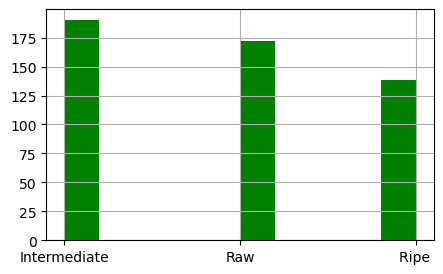

In [3]:
y.hist(figsize=(5,3), color="Green")
#plt.show()

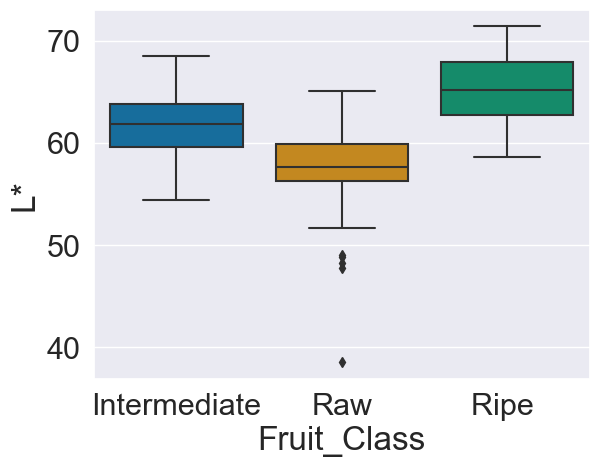

In [4]:
sns.set(font_scale= 2)
sns.boxplot(y='L*', x='Fruit_Class', 
                 data=mango_file, 
                 palette="colorblind")


plt.show()

<AxesSubplot:xlabel='Fruit_Class', ylabel='a*'>

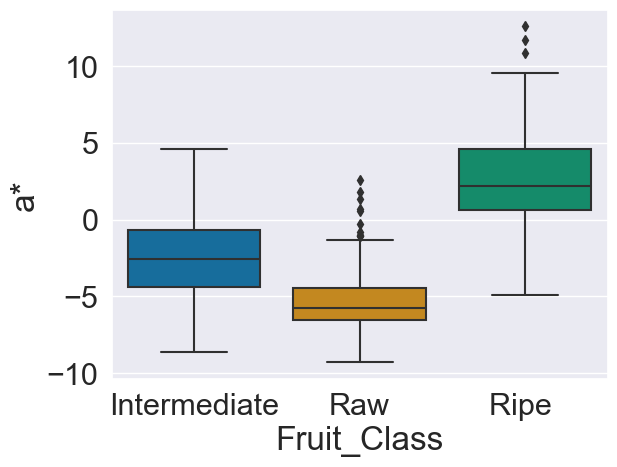

In [5]:
sns.set(font_scale= 2)
sns.boxplot(y='a*', x='Fruit_Class', 
                 data=mango_file, 
                 palette="colorblind")

<AxesSubplot:xlabel='Fruit_Class', ylabel='b*'>

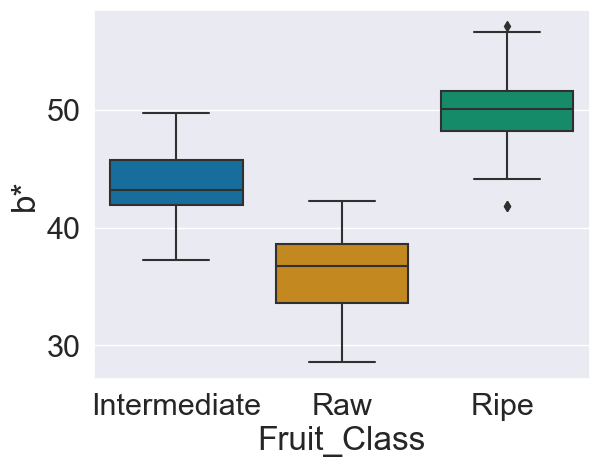

In [6]:
sns.set(font_scale= 2)
sns.boxplot(y='b*', x='Fruit_Class', 
                 data=mango_file, 
                 palette="colorblind")

In [7]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [11]:
# Splitting train and split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=50)

In [12]:
MLA = [ 
     
    #SVM
    svm.SVC(probability=True, kernel="linear"),
     
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Trees    
    tree.DecisionTreeClassifier(max_depth=5),
    
    #Ensemble Methods
    ensemble.RandomForestClassifier(max_depth=5, n_estimators = 40),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors= 3),
    ]

SVC:
               precision    recall  f1-score   support

Intermediate       0.98      0.98      0.98        63
         Raw       0.98      0.98      0.98        50
        Ripe       1.00      1.00      1.00        37

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

GaussianNB:
               precision    recall  f1-score   support

Intermediate       0.98      0.97      0.98        63
         Raw       0.96      1.00      0.98        50
        Ripe       1.00      0.97      0.99        37

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

DecisionTreeClassifier:
               precision    recall  f1-score   support

Intermediate       0.97      0.90      0.93        63
         Raw       0.91      1.00      0.95        50
        Ripe       0.97      0.

,MLA used,MLA Parameters,Execution Time (sec),val Score,Accuracy,Train Accuracy,Test Accuracy,Recall,Pericison,F1 Score,MCC,MAE,R2,RMSE
0,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.07,0.9886,98.67,0.9943,0.9867,0.988042,0.988042,0.988042,0.0133,0.9795,0.9791,0.1155
1,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.02,0.9410,98.00,0.9629,0.9800,0.980409,0.981803,0.980898,0.0267,0.9695,0.9372,0.2000
2,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.02,0.8971,94.67,0.9771,0.9467,0.950236,0.949138,0.948570,0.0733,0.9197,0.8220,0.3367
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.78,0.9305,97.33,0.9971,0.9733,0.977460,0.975305,0.976175,0.0267,0.9594,0.9581,0.1633
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.06,0.9362,97.33,0.9829,0.9733,0.977460,0.975305,0.976175,0.0267,0.9594,0.9581,0.1633


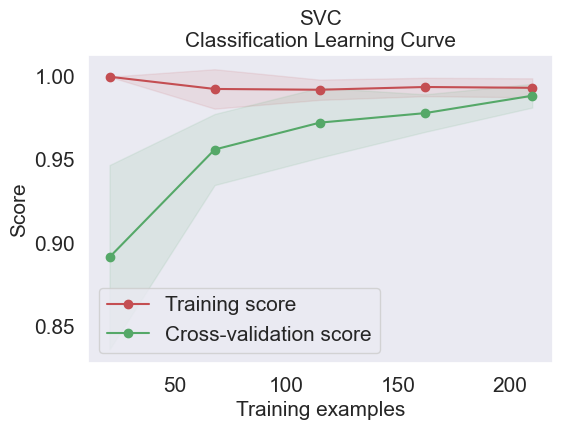

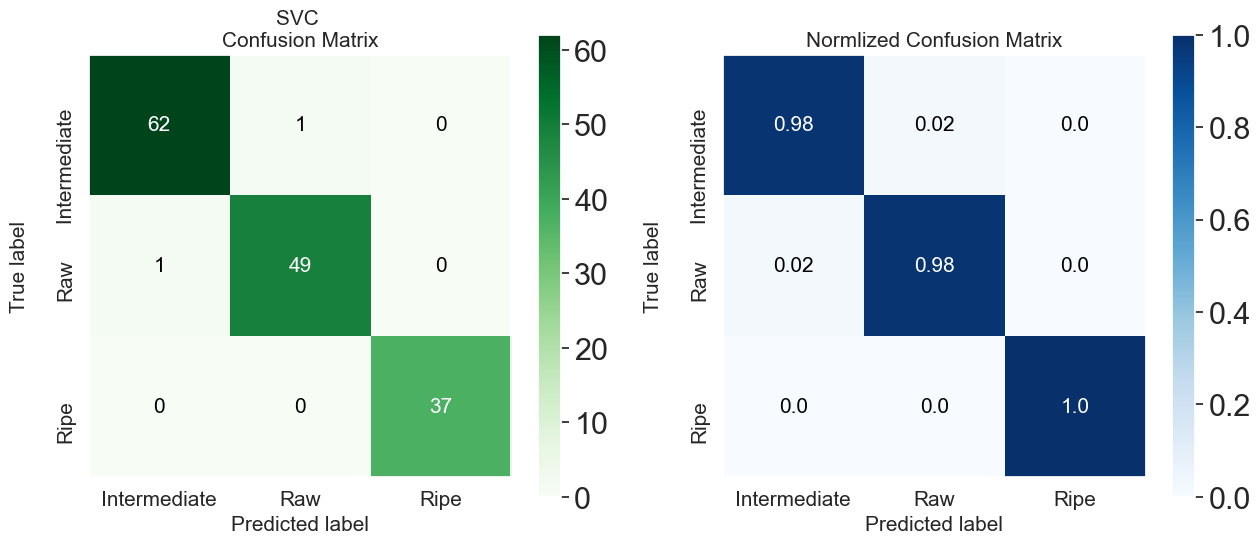

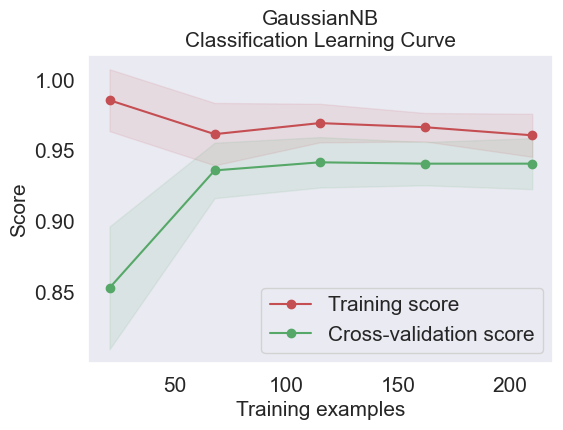

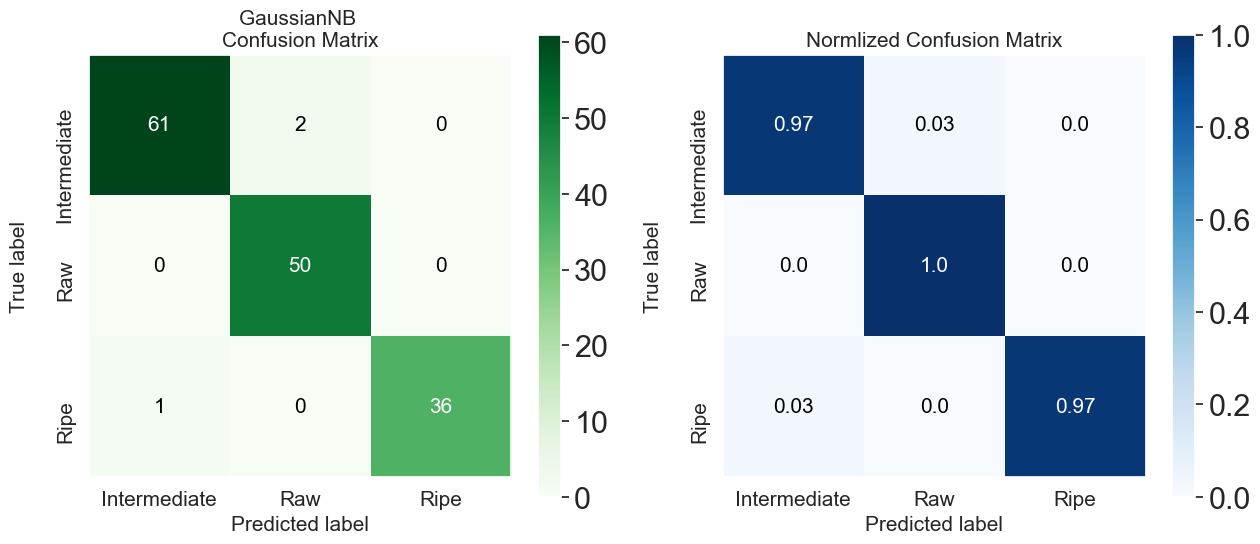

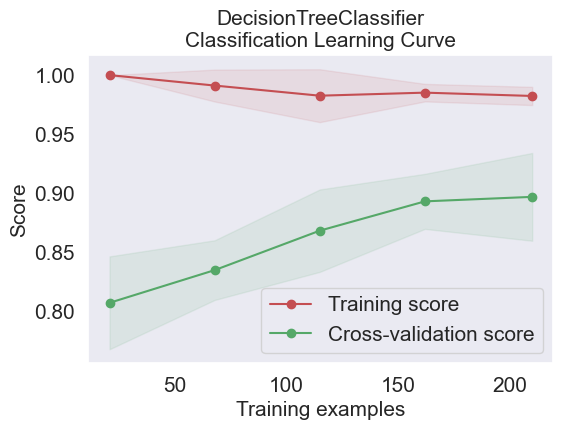

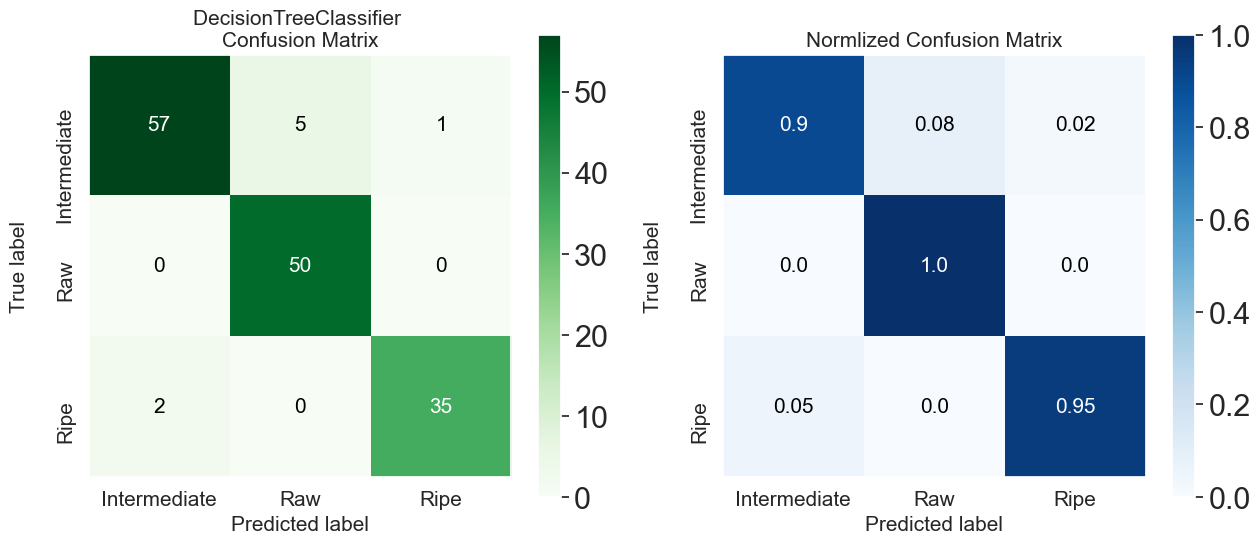

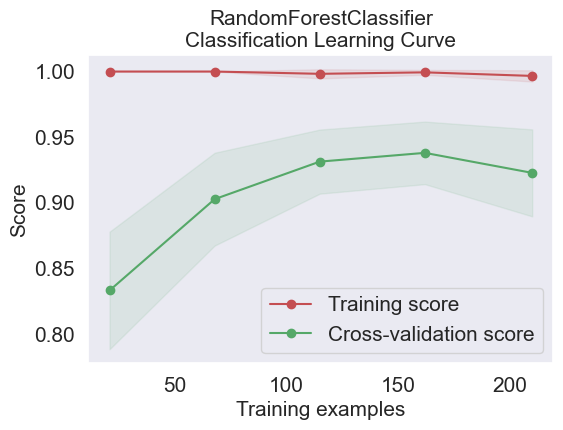

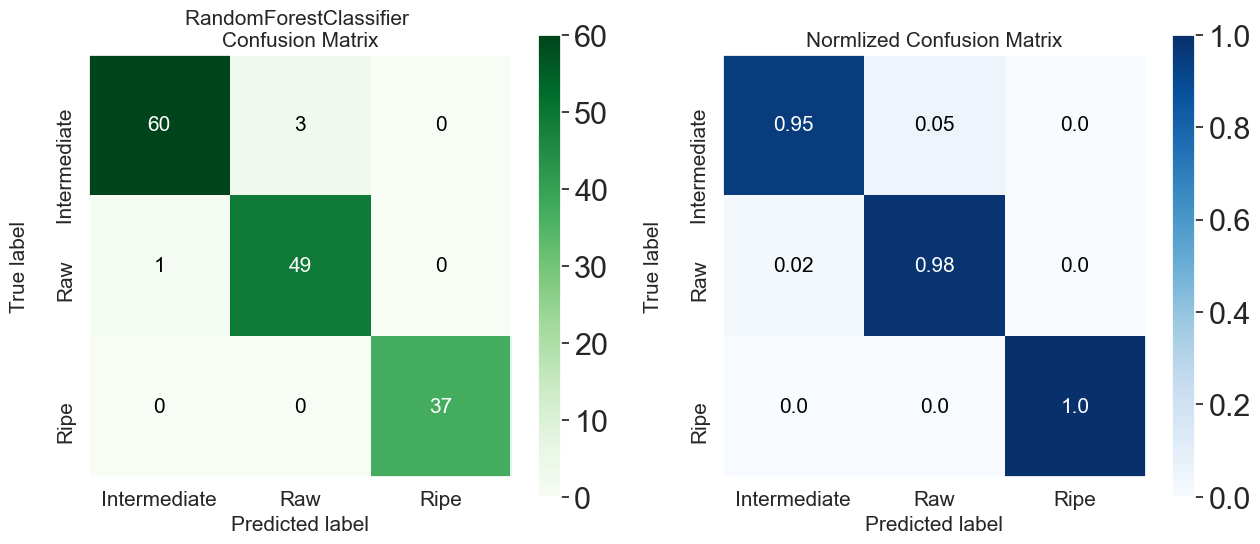

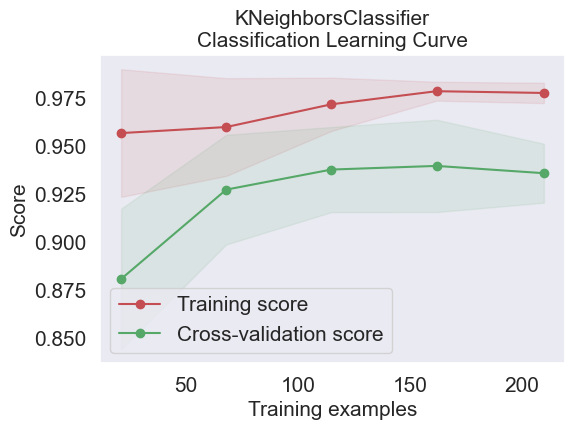

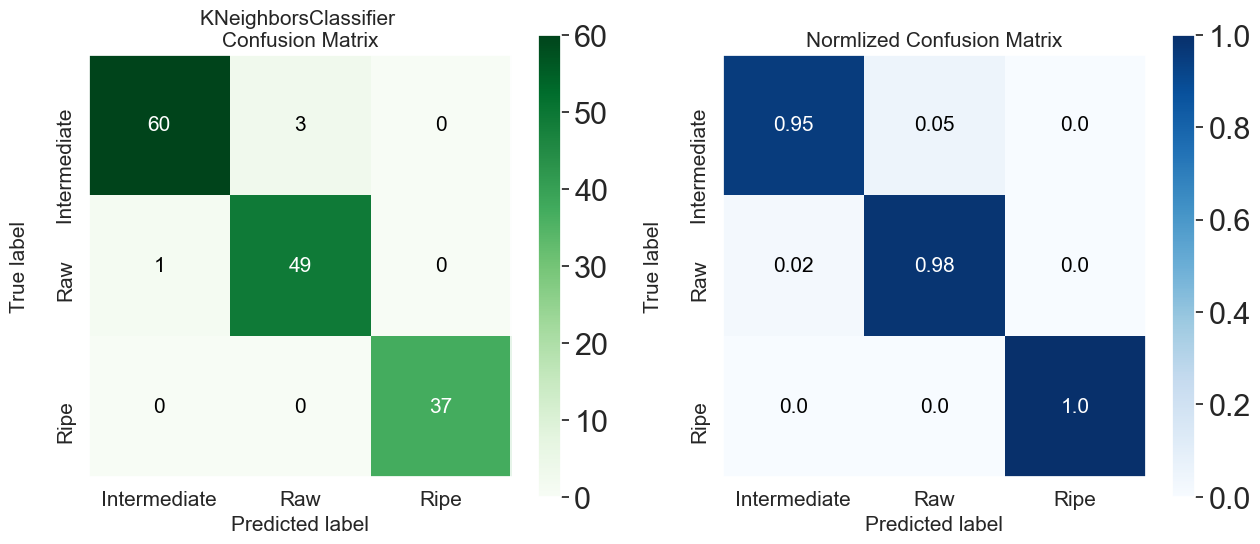

In [13]:
MLA_columns = []
names = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
scoring = "accuracy"
results = []
row_index = 0
for alg in MLA:  
    start = time.time()
    kfold = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
    cv_results = model_selection.cross_val_score(alg,x_train, y_train , cv=kfold)
    results.append(cv_results)
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted, pos_label=1)
    MLA_name = alg.__class__.__name__
    names.append(MLA_name)
    end = time.time()
    
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    MLA_compare.loc[row_index,'Execution Time (sec)'] = round(end-start , 2)
    MLA_compare.loc[row_index,'val Score'] = round(cv_results.mean(), 4)
    MLA_compare.loc[row_index, "Accuracy"] = round(accuracy_score(y_test, predicted)*100,2)
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Recall'] =  recall_score(y_test, predicted, average= "macro")
    MLA_compare.loc[row_index, 'Pericison'] =precision_score(y_test, predicted, average= "macro")
    MLA_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted, average= "macro")
    MLA_compare.loc[row_index, 'MCC']= round(metrics.mean_absolute_error(y_test, predicted),4)
    MLA_compare.loc[row_index, 'MAE']= round(metrics.matthews_corrcoef(y_test, predicted),4)
    MLA_compare.loc[row_index, 'R2'] = round(r2_score(y_test, predicted),4)
    MLA_compare.loc[row_index, 'RMSE'] = round(math.sqrt(mean_squared_error(y_test, predicted)),4)
    classify_metrics = classification_report(y_test,predicted, target_names = ['Intermediate', 'Raw', "Ripe"]) 
    print(f"{MLA_name}:\n {classify_metrics}")
      
    
    
    #average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')
    skplt.estimators.plot_learning_curve(alg, x_train, y_train,
                                     cv=kfold, shuffle=True, scoring="accuracy",
                                     n_jobs= 4, figsize=(6,4), title_fontsize=15 , text_fontsize=15,
                                     title=f"{MLA_name}\nClassification Learning Curve")
    
    
    row_index+=1
    fig = plt.figure(figsize=(15,6))

    ax1 = fig.add_subplot(121)
    skplt.metrics.plot_confusion_matrix(y_test, predicted,
                                    title=f"{MLA_name} \nConfusion Matrix",title_fontsize=15,
                                    cmap="Greens",text_fontsize=15,
                                    ax=ax1)
    ax1.xaxis.set_ticklabels(['Intermediate', 'Raw', "Ripe"]); 
    ax1.yaxis.set_ticklabels(['\n Intermediate', 'Raw', "Ripe"], rotation = 90);
    ax1.tick_params(axis='both', which='major', labelsize=15) 
    ax2 = fig.add_subplot(122)
    skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=True,
                                    title="\nNormlized Confusion Matrix",title_fontsize=15,
                                    cmap="Blues",text_fontsize=15,
                                    ax=ax2)
    ax2.xaxis.set_ticklabels(['Intermediate', 'Raw', "Ripe"]); 
    ax2.yaxis.set_ticklabels(['\n Intermediate', 'Raw', "Ripe"], rotation = 90);
    ax2.tick_params(axis='both', which='major', labelsize=15)   
    
    
#MLA_compare.sort_values(by = ['Test Accuracy'], ascending = True, inplace = True)    
MLA_compare.to_csv("MLA_Compare.csv")
MLA_compare

In [11]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

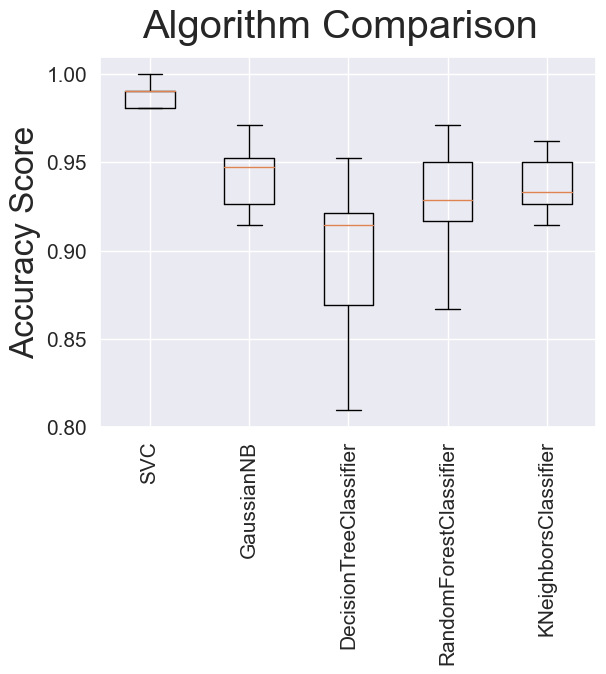

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.xlabel("Different MLAs")
plt.ylabel("Accuracy Score")
ax.set_xticklabels(names, rotation= 90)
ax.tick_params(labelsize=15)   
plt.show()
    

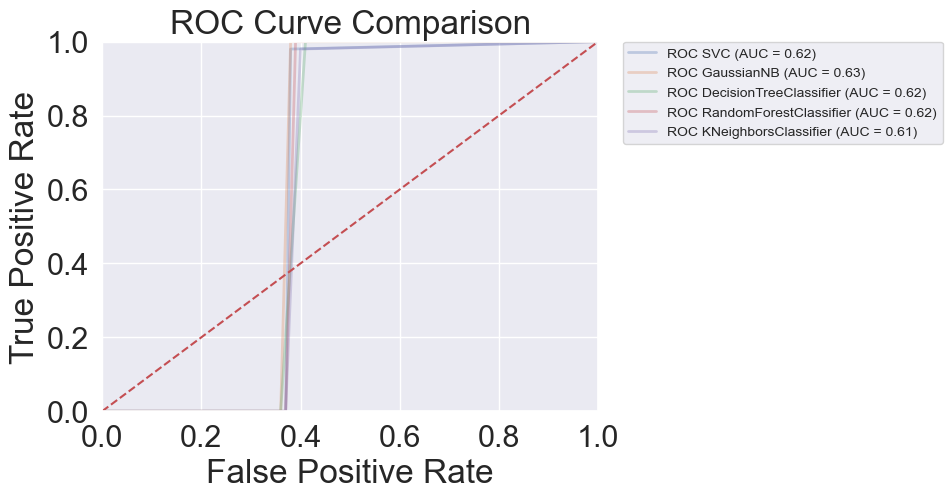

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Creating a plot to show the ROC for all MLA models
index = 1
for alg in MLA:
    # Fit the algorithm to the training data and make predictions on the test data
    predicted = alg.fit(x_train, y_train).predict(x_test)
    
    # Compute the ROC curve and the area under the ROC curve
    fp, tp, th = roc_curve(y_test, predicted, pos_label=1)
    roc_auc_mla = auc(fp, tp)
    
    # Get the name of the algorithm for labeling
    MLA_name = alg.__class__.__name__
    
    # Plot the ROC curve for the current algorithm
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)' % (MLA_name, roc_auc_mla))
    
    index += 1

# Set plot title and legend
plt.title('ROC Curve Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'r--')

# Set plot limits and labels
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Display the plot
plt.show()


Text(0, 0.5, 'Algorithms Used\n')

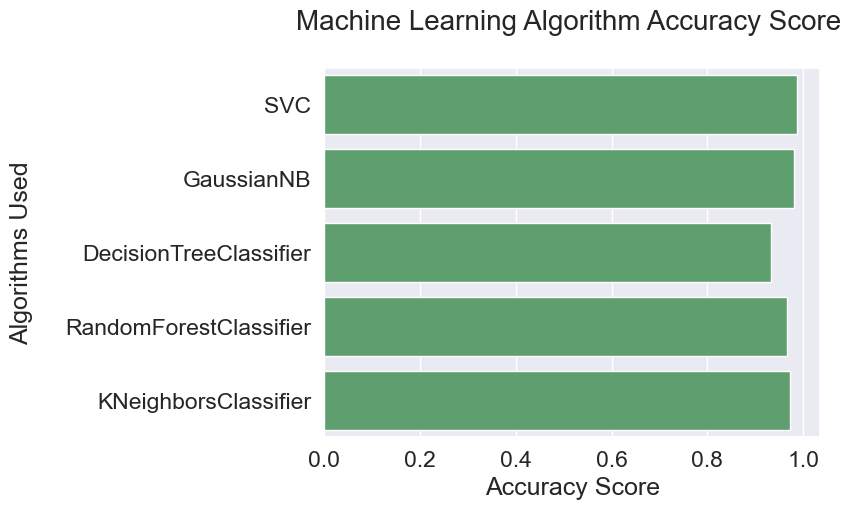

In [25]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.set(font_scale=1.5)
sns.barplot(x='Test Accuracy', y = 'MLA used', data = MLA_compare, color = 'g')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n', fontsize=20)

plt.xlabel('Accuracy Score')
plt.ylabel('Algorithms Used\n')